## Hospital Appointment Data
#### This dataset collects information from 100,000 medical appointments in Brazil and is focussed on the question of whether or not patients show up for their appointment
#### In this notebook, we analyze characteristics of patients who show up for appointments versus those who don't show up. 

1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

2. Read the csv file with the data and observe how many observations and variables are are in this dataset.

In [2]:
noShowOrig=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
noShowOrig.shape

(110527, 14)

#### This dataset has 110,527 observations with 14 variables; how do these observations look like and what are these variables?

In [4]:
noShowOrig.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Still checking my data,I want to know how many unique patients are there in this dataset?

In [5]:
np.unique(noShowOrig['PatientId']).shape

(62299L,)

#### I want to check if appointments overlap or are equal to the number of observations. My assumption is that they should be equal to the number of observations

In [6]:
np.unique(noShowOrig['AppointmentID']).shape

(110527L,)

#### If each patient has a unique patient ID then out of the 110,527 appointments there are 62,299 unique patients

#### Run ```describe()``` function on dataset

In [7]:
noShowOrig.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921800e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Take a closer look at the Age numerical variable

#### Minimum age shows -1 which is incorrect. My assumption is that age should be greater than or equal to zero, where Age = 0 means a baby less than 1 year old. 

#### Find how many rows in data have age less than zero and remove those observations from the dataset

In [8]:
pd.Series.value_counts(noShowOrig['Age']<0)

False    110526
True          1
Name: Age, dtype: int64

#### There is one record that has age less than 0

#### Find out the patient with the age as -1 and check if there are other medical records for the same patient which may have the correct age, if not take the data out of the analysis

In [9]:
noShowOrig[noShowOrig.Age<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


#### Since there can be more than one observation for a unique patientID, check if patientID with age < 0 has other observations

In [10]:
noShowOrig[noShowOrig.PatientId==465943158731293]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


#### PatientID for age less than 0 returns one observation, therefore i remove the observation and create an updated dataframe for the analysis

In [11]:
hospitalApptData = noShowOrig[noShowOrig.Age>=0]

In [12]:
hospitalApptData.shape

(110526, 14)

In [13]:
hospitalApptData.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921800e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
hospitalApptData.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### The new data set ```hospitalApptData``` is now without the record of ages less than 0 years

In [16]:
np.unique(hospitalApptData['PatientId']).shape

(62298L,)

#### The updated dataset has 62298 unique patients

#### Rename the No-Show column to No_Show. Facing some issues with the '-' in the variable name

In [17]:
hospitalApptData = hospitalApptData.rename(columns = {'No-show':'No_Show'})
hospitalApptData.columns

Index([u'PatientId', u'AppointmentID', u'Gender', u'ScheduledDay',
       u'AppointmentDay', u'Age', u'Neighbourhood', u'Scholarship',
       u'Hipertension', u'Diabetes', u'Alcoholism', u'Handcap',
       u'SMS_received', u'No_Show'],
      dtype='object')

### Explore the Data. 

##### Create contingency tables for No-Show category with other variables

#### Does the patient's gender affect keeping an appointment or not?

In [32]:
noShowGender = pd.crosstab(hospitalApptData['No_Show'],hospitalApptData['Gender'],margins=True)
noShowGender.columns = ['Female','Male','GenderTotal']
noShowGender.index = ['Showed Up for Appt', 'Missed Appt','ApptTotal']

In [33]:
noShowGender

,Female,Male,GenderTotal
Showed Up for Appt,57245,30962,88207
Missed Appt,14594,7725,22319
ApptTotal,71839,38687,110526


#### From the table, we observe that of the 110,526 medical appointments, 71,839 representing 65% are female and 38,687 (35%) are male. 

Text(0,0.5,u'Missed Appointment?')

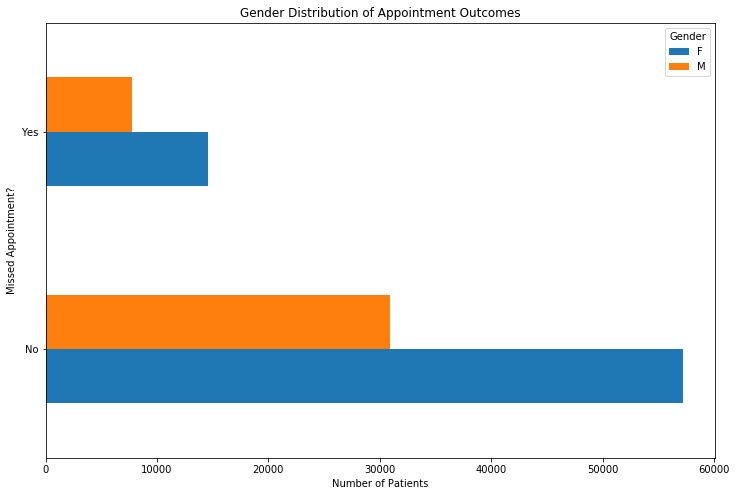

In [38]:
noShowGenderPlot = pd.crosstab(hospitalApptData['No_Show'],hospitalApptData['Gender'])
#figure1, ax_gen = plt.subplots(figsize=(12,8))
ax_gen = noShowGenderPlot.plot.barh(figsize=(12,8))
ax_gen.set_title('Gender Distribution of Appointment Outcomes')
ax_gen.set_xlabel('Number of Patients')
ax_gen.set_ylabel('Missed Appointment?')

#### Conditional Probabilities of our categorical variables No_Show and Gender

In [40]:
condProbGen = noShowGender/noShowGender.loc['ApptTotal','GenderTotal']
condProbGen

,Female,Male,GenderTotal
Showed Up for Appt,0.517932,0.280133,0.798066
Missed Appt,0.132041,0.069893,0.201934
ApptTotal,0.649974,0.350026,1.000000


#### From the table above, we can tell that overall there is an approximately 65% chance of selecting a female patient and 35% chance of selecting a male patient. 

#### Also the probability of a patient not showing up for an appointment is 20%.

#### The question is that do these probabilities increase or decrease when these patients are male or female?

#### Given the appointment outcomes, can we tell if chances of the patient being a male or female increases or decrease?

In [50]:
noShowGender.div(noShowGender['GenderTotal'],axis = 'index')

,Female,Male,GenderTotal
Showed Up for Appt,0.648985,0.351015,1.0
Missed Appt,0.653882,0.346118,1.0
ApptTotal,0.649974,0.350026,1.0


#### Given Male of Female patients, can we tell if the probability of showing up for an appoinment increases or decreases?

In [20]:
noShowGender/noShowGender.loc['ApptTotal']

,Female,Male,GenderTotal
Showed Up for Appt,0.796851,0.800321,0.798066
No Show for Appt,0.203149,0.199679,0.201934
ApptTotal,1.000000,1.000000,1.000000


#### It is very interesting to note as well that of the 88,207 people that showed up for their appointments, approximately 65% were female and the rest (35%) were male

#### In like manner approximately 65% of the 22,319 no-shows were female and the rest were male. 


### What about Age Groupings? Do specific age groups not show up for appointments?

#### Create bins for the age groups 

In [21]:
bins = np.array([-1,13,18,25,35,45,55,65,75,200])

In [22]:
ageBins = pd.cut(noShowUpdt['Age'], bins)

In [23]:
pd.crosstab(noShowUpdt['No_Show'],ageBins,margins=True)

Age,"(-1, 13]","(13, 18]","(18, 25]","(25, 35]","(35, 45]","(45, 55]","(55, 65]","(65, 75]","(75, 200]",All
No_Show,,,,,,,,,,
No,17529,4990,7262,11122,11500,12603,11966,6713,4522,88207
Yes,4610,1737,2471,3282,3082,2834,2237,1196,870,22319
All,22139,6727,9733,14404,14582,15437,14203,7909,5392,110526


In [35]:
#ageTable = pd.crosstab(index=noShowUpdt['No_Show'],columns=noShowUpdt['Age'])
ageTable = noShowUpdt['Age']

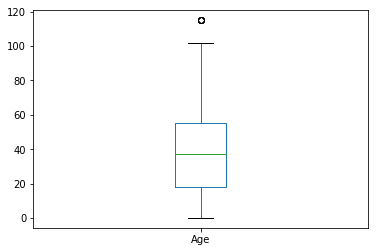

In [48]:
ageTable.plot(kind='box')

#### Pull out DataFrames for Patients who showed up and Patients who didnt show up for their medical appointments

In [55]:
pd.Series.value_counts(noShowUpdt['No_Show']=='Yes')

False    88207
True     22319
Name: No_Show, dtype: int64

In [49]:
apptKept = noShowUpdt[noShowUpdt['No_Show']=='No']

In [51]:
apptKept.shape

(88207, 14)

In [52]:
apptMissed = noShowUpdt[noShowUpdt['No_Show']=='Yes']

In [53]:
apptMissed.shape

(22319, 14)

#### Create a box and whisker plot to compare the age distributions for those who kept vs missed their appointments

{'boxes': [<matplotlib.lines.Line2D at 0x1a5cdd68>,
 'caps': [<matplotlib.lines.Line2D at 0x169c0550>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a381470>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x169c0710>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1a5cddd8>,
  <matplotlib.lines.Line2D at 0x16d47518>]}

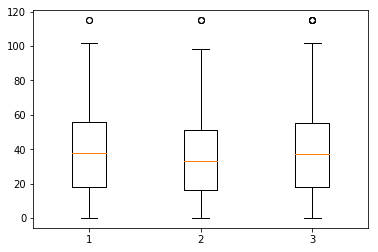

In [68]:
plt.boxplot([apptKept['Age'],apptMissed['Age'],noShowUpdt['Age']])

### Does the neighborhood affect patients showing up to appointments or not?

### How effective were the SMS reminders? Did those who received them show up more than those who didnt receive SMS

### Did being on Bolsa Familia Scholarship encourage more people with appointments to show up?